In [1]:
import deepchem as dc
from deepchem.feat.graph_data import GraphData
from deepchem.feat import MolGraphConvFeaturizer
import numpy as np
import pandas as pd

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (C:\Users\yyyyx\miniconda3\envs\deepchem\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
df = pd.read_csv('./BBB_DB.csv')

In [3]:
df

,Unnamed: 0,Drug_ID,Drug,Y
0,0,Propanolol,CC(C)NCC(O)COc1cccc2ccccc12.[Cl],1
1,1,Terbutylchlorambucil,CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1,1
2,2,40730,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,1
3,3,24,CC(=O)NCCCOc1cccc(CN2CCCCC2)c1,1
4,4,cloxacillin,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...,1
...,...,...,...,...
2025,2025,licostinel,O=c1[nH]c2cc(Cl)c(Cl)c([N+](=O)[O-])c2[nH]c1=O,1
2026,2026,ademetionine(adenosyl-methionine),C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,1
2027,2027,mesocarb,CC(Cc1ccccc1)n1cc([N-]C(=O)Nc2ccccc2)[o+]n1,1
2028,2028,tofisoline,CCc1c(C)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(OC...,1


In [4]:
# 1. SMILES에서 그래프 형식으로 변환
featurizer = MolGraphConvFeaturizer()
features = featurizer.featurize(df["Drug"])  # Smiles 컬럼에서 특징 추출

[15:07:32] WARNING: not removing hydrogen atom without neighbors
[15:07:32] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:35] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not r

In [5]:
features

array([GraphData(node_features=[20, 30], edge_index=[2, 40], edge_features=None),
       GraphData(node_features=[23, 30], edge_index=[2, 46], edge_features=None),
       GraphData(node_features=[26, 30], edge_index=[2, 58], edge_features=None),
       ...,
       GraphData(node_features=[24, 30], edge_index=[2, 52], edge_features=None),
       GraphData(node_features=[28, 30], edge_index=[2, 60], edge_features=None),
       GraphData(node_features=[21, 30], edge_index=[2, 42], edge_features=None)],
      dtype=object)

In [6]:
# 2. 레이블 설정 (pIC50)
labels = df["Y"].values

In [7]:
# 3. 가중치 (필요시 기본값으로 1 설정)
weights = None  # 기본적으로 None으로 설정. 커스텀 가중치가 있으면 지정.

# 4. 데이터셋 생성
dataset = dc.data.NumpyDataset(X=features, y=labels, w=weights)

In [8]:
invalid_indices = []
for i, x_item in enumerate(dataset.X):
    # 예: x_item 이 비어 있거나, 그래프가 아닌 ndarray인 경우 invalid 처리
    if (isinstance(x_item, np.ndarray) and len(x_item) == 0):
        invalid_indices.append(i)

print("Invalid indices:", invalid_indices)


Invalid indices: []


In [9]:
import deepchem as dc
import numpy as np

# 유효한 인덱스를 골라낸다
valid_indices = [
    i for i in range(len(dataset.X)) if i not in invalid_indices
]

# 유효한 X, y, w, ids만 추출
filtered_X   = [dataset.X[i] for i in valid_indices]
filtered_y   = [dataset.y[i] for i in valid_indices]
filtered_w   = [dataset.w[i] for i in valid_indices]
filtered_ids = [dataset.ids[i] for i in valid_indices]

# 새롭게 NumpyDataset 생성
new_dataset = dc.data.NumpyDataset(
    X=filtered_X,
    y=filtered_y,
    w=filtered_w,
    ids=filtered_ids
)

# 이제 new_test_dataset을 대신 사용하면 됨


In [10]:
dataset

<NumpyDataset X.shape: (2030,), y.shape: (2030,), w.shape: (2030,), task_names: [0]>

In [11]:
new_dataset

<NumpyDataset X.shape: (2030,), y.shape: (2030,), w.shape: (2030,), task_names: [0]>

In [12]:
# 데이터셋 확인
print(f"Number of samples in dataset: {len(new_dataset)}")
print(f"Feature shape: {new_dataset.X[0].node_features.shape[0]} nodes, {new_dataset.X[0].edge_index.shape[1]} edges")
print(f"First label: {new_dataset.y[0]}")

Number of samples in dataset: 2030
Feature shape: 20 nodes, 40 edges
First label: 1


In [13]:
# 데이터셋을 Train/Validation/Test로 나누기
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(new_dataset)

# 확인
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(valid_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 1624
Validation dataset size: 203
Test dataset size: 203


In [14]:
# GCNModel 초기화
model = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[64, 64],
    dense_layer_size=128,
    dropout=0.2,
    mode='classification',
    learning_rate=1e-3,
    batch_size=128,
)

In [44]:
%%time
model.fit(train_dataset, nb_epoch=10)

CPU times: total: 37.3 s
Wall time: 9.38 s


0.3493504842122396

In [29]:
# GCNModel 초기화
model_100 = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[64, 64],
    dense_layer_size=128,
    dropout=0.2,
    mode='classification',
    learning_rate=1e-3,
    batch_size=128,
)

In [30]:
%%time
model_100.fit(train_dataset, nb_epoch=100)

CPU times: total: 6min 15s
Wall time: 1min 31s


0.17730518341064452

In [20]:
# 1. Test 데이터셋에 대한 예측값 추론
y_pred = model.predict(test_dataset)

In [28]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Training set score:', model.evaluate(train_dataset, [metric]))
print('Training set score:', model.evaluate(test_dataset, [metric]))
print('Training set score:', model.evaluate(valid_dataset, [metric]))

Training set score: {'roc_auc_score': 0.9139903697255309}
Training set score: {'roc_auc_score': 0.8808720112517581}
Training set score: {'roc_auc_score': 0.8814516129032259}


In [31]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Training set score:', model_100.evaluate(train_dataset, [metric]))
print('Training set score:', model_100.evaluate(test_dataset, [metric]))
print('Training set score:', model_100.evaluate(valid_dataset, [metric]))

Training set score: {'roc_auc_score': 0.97754662375384}
Training set score: {'roc_auc_score': 0.8440225035161744}
Training set score: {'roc_auc_score': 0.9118279569892473}


In [19]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score:", model.evaluate(train_dataset, [metric]))
print("Test set score:", model.evaluate(test_dataset, [metric]))

Training set score: {'pearson_r2_score': 0.8728071088137395}
Test set score: {'pearson_r2_score': 0.7761037587217018}


In [18]:
# 모델 평가 / GPT 파라미터 버전
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
train_score = model.evaluate(train_dataset, [metric])
valid_score = model.evaluate(valid_dataset, [metric])

print("Train score:", train_score)
print("Validation score:", valid_score)

Train score: {'pearson_r2_score': 0.8631181271812122}
Validation score: {'pearson_r2_score': 0.7911024220563603}


In [19]:
###############################################################################
# 4. 모델 평가
###############################################################################
# 평가지표 설정 (예: R^2 스코어, MAE, RMSE 등)
metric_r2 = dc.metrics.Metric(dc.metrics.pearson_r2_score)
metric_mae = dc.metrics.Metric(dc.metrics.mean_absolute_error)

print("Train R^2: ", model.evaluate(train_dataset, [metric_r2]))
print("Valid R^2: ", model.evaluate(valid_dataset, [metric_r2]))
print("Test  R^2: ", model.evaluate(test_dataset, [metric_r2]))

print("Train MAE: ", model.evaluate(train_dataset, [metric_mae]))
print("Valid MAE: ", model.evaluate(valid_dataset, [metric_mae]))
print("Test  MAE: ", model.evaluate(test_dataset, [metric_mae]))


Train R^2:  {'pearson_r2_score': 0.8631181271812122}
Valid R^2:  {'pearson_r2_score': 0.7911024220563603}
Test  R^2:  {'pearson_r2_score': 0.7929518347023322}
Train MAE:  {'mean_absolute_error': 0.7054202499754564}
Valid MAE:  {'mean_absolute_error': 0.7932570925883062}
Test  MAE:  {'mean_absolute_error': 0.7494379179466186}


In [18]:
import numpy as np
# 기존 데이터를 수정
new_train_y = train_dataset.y.reshape(-1)
new_valid_y = valid_dataset.y.reshape(-1)

# 새로운 데이터셋 생성
train_dataset = dc.data.NumpyDataset(X=train_dataset.X, y=new_train_y, w=train_dataset.w, ids=train_dataset.ids)
valid_dataset = dc.data.NumpyDataset(X=valid_dataset.X, y=new_valid_y, w=valid_dataset.w, ids=valid_dataset.ids)


In [19]:
train_dataset

<NumpyDataset X.shape: (1624,), y.shape: (1624,), w.shape: (1624,), task_names: [0]>

In [20]:
print(train_dataset.y.shape)  # (num_samples, 1)
print(valid_dataset.y.shape)  # (num_samples, 1)


(1624,)
(203,)


In [21]:
print("Unique train labels:", np.unique(train_dataset.y))
print("Unique valid labels:", np.unique(valid_dataset.y))


Unique train labels: [0 1]
Unique valid labels: [0 1]


In [27]:
import pandas as pd
import deepchem as dc
from itertools import product
from tqdm import tqdm

# 하이퍼파라미터 설정
param_grid = {
    'graph_conv_layers': [[64, 64], [128, 128], [64, 128, 64]],
    'dense_layer_size': [128, 256],
    'dropout': [0.2, 0.3],
    'learning_rate': [1e-3, 5e-4, 1e-4]
}

# 하이퍼파라미터 조합 생성
combinations = list(product(
    param_grid['graph_conv_layers'],
    param_grid['dense_layer_size'],
    param_grid['dropout'],
    param_grid['learning_rate']
))

# 결과 저장 리스트 초기화
results = []

# 데이터셋과 평가 지표가 준비되었다고 가정
# train_dataset, valid_dataset: DeepChem의 NumpyDataset 형식
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

# 그리드 서치 진행
for idx, (graph_conv_layers, dense_layer_size, dropout, learning_rate) in enumerate(tqdm(combinations, desc="Grid Search Progress")):
    print(f"\nRunning combination {idx + 1}/{len(combinations)}:")
    print(f"graph_conv_layers: {graph_conv_layers}, dense_layer_size: {dense_layer_size}, dropout: {dropout}, learning_rate: {learning_rate}")
    
    # 모델 초기화
    try:
        model = dc.models.GCNModel(
            n_tasks=1,
            graph_conv_layers=graph_conv_layers,
            dense_layer_size=dense_layer_size,
            dropout=dropout,
            mode='classification',
            learning_rate=learning_rate,
            batch_size=128
        )
        
        # 모델 학습
        model.fit(train_dataset, nb_epoch=10)
        
        # 모델 평가
        train_score = model.evaluate(train_dataset, [metric])
        valid_score = model.evaluate(valid_dataset, [metric])
        
        # 결과 저장
        results.append({
            'graph_conv_layers': graph_conv_layers,
            'dense_layer_size': dense_layer_size,
            'dropout': dropout,
            'learning_rate': learning_rate,
            'batch_size': 128,
            'train_roc_auc_score': train_score['roc_auc_score'],
            'valid_roc_auc_score': valid_score['roc_auc_score']
        })
        
        print(f"Train R2 Score: {train_score['roc_auc_score']}, Validation R2 Score: {valid_score['roc_auc_score']}")
    except Exception as e:
        print(f"Error during training for combination {idx + 1}: {e}")

# 결과를 데이터프레임으로 저장
results_df = pd.DataFrame(results)

Grid Search Progress:   0%|                                                                     | 0/36 [00:00<?, ?it/s]


Running combination 1/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:   3%|█▋                                                           | 1/36 [00:10<06:13, 10.67s/it]

Train R2 Score: 0.8993176315210214, Validation R2 Score: 0.9155358626419274

Running combination 2/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:   6%|███▍                                                         | 2/36 [00:21<06:04, 10.72s/it]

Train R2 Score: 0.8522132427701434, Validation R2 Score: 0.8499030739407367

Running combination 3/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:   8%|█████                                                        | 3/36 [00:32<05:53, 10.72s/it]

Train R2 Score: 0.8072377178914709, Validation R2 Score: 0.8670728330102464

Running combination 4/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  11%|██████▊                                                      | 4/36 [00:42<05:37, 10.53s/it]

Train R2 Score: 0.8358547425133381, Validation R2 Score: 0.806182497923013

Running combination 5/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  14%|████████▍                                                    | 5/36 [00:52<05:20, 10.32s/it]

Train R2 Score: 0.8316583335953796, Validation R2 Score: 0.8767654389365827

Running combination 6/36:
graph_conv_layers: [64, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  17%|██████████▏                                                  | 6/36 [01:02<05:06, 10.21s/it]

Train R2 Score: 0.7769263021079, Validation R2 Score: 0.8364718914428136

Running combination 7/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  19%|███████████▊                                                 | 7/36 [01:12<04:51, 10.07s/it]

Train R2 Score: 0.9016236386696436, Validation R2 Score: 0.8990584325671559

Running combination 8/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  22%|█████████████▌                                               | 8/36 [01:22<04:41, 10.06s/it]

Train R2 Score: 0.8692210936762994, Validation R2 Score: 0.8393796732207144

Running combination 9/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  25%|███████████████▎                                             | 9/36 [01:32<04:31, 10.04s/it]

Train R2 Score: 0.8208761778979696, Validation R2 Score: 0.8476876211575741

Running combination 10/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  28%|████████████████▋                                           | 10/36 [01:42<04:21, 10.07s/it]

Train R2 Score: 0.87428068299739, Validation R2 Score: 0.8832733314871226

Running combination 11/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  31%|██████████████████▎                                         | 11/36 [01:52<04:09, 10.00s/it]

Train R2 Score: 0.8486153475257592, Validation R2 Score: 0.8738576571586818

Running combination 12/36:
graph_conv_layers: [64, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  33%|████████████████████                                        | 12/36 [02:02<04:01, 10.04s/it]

Train R2 Score: 0.8089509763843905, Validation R2 Score: 0.8583494876765438

Running combination 13/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  36%|█████████████████████▋                                      | 13/36 [02:12<03:51, 10.06s/it]

Train R2 Score: 0.901379411548903, Validation R2 Score: 0.9083356410966492

Running combination 14/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  39%|███████████████████████▎                                    | 14/36 [02:22<03:42, 10.11s/it]

Train R2 Score: 0.882761024286448, Validation R2 Score: 0.8857657158681805

Running combination 15/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  42%|█████████████████████████                                   | 15/36 [02:32<03:31, 10.09s/it]

Train R2 Score: 0.8422486714254269, Validation R2 Score: 0.8450567709775685

Running combination 16/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  44%|██████████████████████████▋                                 | 16/36 [02:42<03:21, 10.10s/it]

Train R2 Score: 0.8917796086076958, Validation R2 Score: 0.9057047909166436

Running combination 17/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  47%|████████████████████████████▎                               | 17/36 [02:52<03:12, 10.11s/it]

Train R2 Score: 0.8786102114189281, Validation R2 Score: 0.8868734422597618

Running combination 18/36:
graph_conv_layers: [128, 128], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  50%|██████████████████████████████                              | 18/36 [03:03<03:02, 10.13s/it]

Train R2 Score: 0.8085835875182122, Validation R2 Score: 0.8521185267238993

Running combination 19/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  53%|███████████████████████████████▋                            | 19/36 [03:12<02:50, 10.05s/it]

Train R2 Score: 0.894535811242833, Validation R2 Score: 0.9147050678482416

Running combination 20/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  56%|█████████████████████████████████▎                          | 20/36 [03:23<02:41, 10.08s/it]

Train R2 Score: 0.8993165833359538, Validation R2 Score: 0.9163666574356134

Running combination 21/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  58%|███████████████████████████████████                         | 21/36 [03:33<02:31, 10.08s/it]

Train R2 Score: 0.8388604131945536, Validation R2 Score: 0.8716422043755193

Running combination 22/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  61%|████████████████████████████████████▋                       | 22/36 [03:43<02:21, 10.08s/it]

Train R2 Score: 0.8884107418005722, Validation R2 Score: 0.8949044585987261

Running combination 23/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  64%|██████████████████████████████████████▎                     | 23/36 [03:53<02:10, 10.06s/it]

Train R2 Score: 0.8683531964403635, Validation R2 Score: 0.8792578233176406

Running combination 24/36:
graph_conv_layers: [128, 128], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  67%|████████████████████████████████████████                    | 24/36 [04:03<02:00, 10.03s/it]

Train R2 Score: 0.8336357347253232, Validation R2 Score: 0.8609803378565495

Running combination 25/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  69%|█████████████████████████████████████████▋                  | 25/36 [04:13<01:50, 10.06s/it]

Train R2 Score: 0.8481457606154943, Validation R2 Score: 0.884796455275547

Running combination 26/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  72%|███████████████████████████████████████████▎                | 26/36 [04:23<01:41, 10.11s/it]

Train R2 Score: 0.8561769546031048, Validation R2 Score: 0.8414566602049294

Running combination 27/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  75%|█████████████████████████████████████████████               | 27/36 [04:33<01:31, 10.15s/it]

Train R2 Score: 0.8262339758707797, Validation R2 Score: 0.8435336471891444

Running combination 28/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  78%|██████████████████████████████████████████████▋             | 28/36 [04:43<01:20, 10.12s/it]

Train R2 Score: 0.8655812710292129, Validation R2 Score: 0.8690113541955138

Running combination 29/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  81%|████████████████████████████████████████████████▎           | 29/36 [04:54<01:10, 10.14s/it]

Train R2 Score: 0.8397068226366047, Validation R2 Score: 0.8551647743007478

Running combination 30/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 128, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress:  83%|██████████████████████████████████████████████████          | 30/36 [05:04<01:00, 10.15s/it]

Train R2 Score: 0.8109703049170361, Validation R2 Score: 0.8251176959291056

Running combination 31/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.001


Grid Search Progress:  86%|███████████████████████████████████████████████████▋        | 31/36 [05:14<00:51, 10.21s/it]

Train R2 Score: 0.8318810729222352, Validation R2 Score: 0.8453337025754639

Running combination 32/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0005


Grid Search Progress:  89%|█████████████████████████████████████████████████████▎      | 32/36 [05:24<00:40, 10.19s/it]

Train R2 Score: 0.8528526356613524, Validation R2 Score: 0.8453337025754639

Running combination 33/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.2, learning_rate: 0.0001


Grid Search Progress:  92%|███████████████████████████████████████████████████████     | 33/36 [05:34<00:30, 10.21s/it]

Train R2 Score: 0.7745977589803256, Validation R2 Score: 0.8474106895596788

Running combination 34/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.001


Grid Search Progress:  94%|████████████████████████████████████████████████████████▋   | 34/36 [05:45<00:20, 10.22s/it]

Train R2 Score: 0.8685020387199565, Validation R2 Score: 0.8719191359734146

Running combination 35/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0005


Grid Search Progress:  97%|██████████████████████████████████████████████████████████▎ | 35/36 [05:55<00:10, 10.21s/it]

Train R2 Score: 0.8401863673050114, Validation R2 Score: 0.8532262531154805

Running combination 36/36:
graph_conv_layers: [64, 128, 64], dense_layer_size: 256, dropout: 0.3, learning_rate: 0.0001


Grid Search Progress: 100%|████████████████████████████████████████████████████████████| 36/36 [06:05<00:00, 10.15s/it]

Train R2 Score: 0.7769069106841504, Validation R2 Score: 0.8289947382996399


KeyError: 'valid_r2_score'

In [29]:
# 유효성 점수 기준으로 정렬
results_df = results_df.sort_values(by='valid_roc_auc_score', ascending=False)

# 결과 저장
results_df.to_csv("gridsearch_results.csv", index=False)

# 상위 결과 출력
print("\nTop Results:")
print(results_df.head())


Top Results:
   graph_conv_layers  dense_layer_size  dropout  learning_rate  batch_size  \
19        [128, 128]               256      0.2         0.0005         128   
0           [64, 64]               128      0.2         0.0010         128   
18        [128, 128]               256      0.2         0.0010         128   
12        [128, 128]               128      0.2         0.0010         128   
15        [128, 128]               128      0.3         0.0010         128   

    train_roc_auc_score  valid_roc_auc_score  
19             0.899317             0.916367  
0              0.899318             0.915536  
18             0.894536             0.914705  
12             0.901379             0.908336  
15             0.891780             0.905705  


In [24]:
train_score = model.evaluate(train_dataset, [metric])
valid_score = model.evaluate(valid_dataset, [metric])

In [25]:
train_score

{'roc_auc_score': 0.8597077660031655}

In [30]:
results_df.head(3)

,graph_conv_layers,dense_layer_size,dropout,learning_rate,batch_size,train_roc_auc_score,valid_roc_auc_score
19,"[128, 128]",256,0.2,0.0005,128,0.899317,0.916367
0,"[64, 64]",128,0.2,0.0010,128,0.899318,0.915536
18,"[128, 128]",256,0.2,0.0010,128,0.894536,0.914705


In [14]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

In [15]:
# GCNModel 초기화
model_1st = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[128, 128],
    dense_layer_size=256,
    dropout=0.2,
    mode='classification',
    learning_rate=0.0005,
    batch_size=128,
)
# GCNModel 초기화
model_2nd = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[64,64],
    dense_layer_size=128,
    dropout=0.2,
    mode='classification',
    learning_rate=0.001,
    batch_size=128,
)
# GCNModel 초기화
model_3rd = dc.models.GCNModel(
    n_tasks=1,
    graph_conv_layers=[128, 128],
    dense_layer_size=256,
    dropout=0.2,
    mode='classification',
    learning_rate=0.001,
    batch_size=128,
)

In [16]:
%%time
model_1st.fit(train_dataset, nb_epoch=100)

CPU times: total: 5min 57s
Wall time: 1min 27s


0.18363338470458984

In [17]:
print('Training set score:', model_1st.evaluate(train_dataset, [metric]))
print('Test set score:', model_1st.evaluate(test_dataset, [metric]))
print('Validation set score:', model_1st.evaluate(valid_dataset, [metric]))

Training set score: {'roc_auc_score': 0.9856974384855445}
Test set score: {'roc_auc_score': 0.9238586616635398}
Validation set score: {'roc_auc_score': 0.9090014064697608}


In [18]:
%%time
model_2nd.fit(train_dataset, nb_epoch=100)

CPU times: total: 5min 50s
Wall time: 1min 25s


0.14279147148132323

In [19]:
print('Training set score:', model_2nd.evaluate(train_dataset, [metric]))
print('Test set score:', model_2nd.evaluate(test_dataset, [metric]))
print('Validation set score:', model_2nd.evaluate(valid_dataset, [metric]))

Training set score: {'roc_auc_score': 0.9921156440864756}
Test set score: {'roc_auc_score': 0.8711694809255786}
Validation set score: {'roc_auc_score': 0.9168776371308017}


In [20]:
%%time
model_3rd.fit(train_dataset, nb_epoch=100)

CPU times: total: 5min 54s
Wall time: 1min 26s


0.12742563247680663

In [21]:
print('Training set score:', model_3rd.evaluate(train_dataset, [metric]))
print('Test set score:', model_3rd.evaluate(test_dataset, [metric]))
print('Validation set score:', model_3rd.evaluate(valid_dataset, [metric]))

Training set score: {'roc_auc_score': 0.9974735042382921}
Test set score: {'roc_auc_score': 0.8958724202626641}
Validation set score: {'roc_auc_score': 0.9392405063291139}


In [34]:
import numpy as np

# 테스트셋 예측 (로짓 혹은 확률)
y_pred_prob = model_1st.predict(test_dataset)  
# y_pred_prob.shape: (num_samples, 2)

# 가장 큰 값을 가진 인덱스를 클래스로 결정
y_pred = np.argmax(y_pred_prob, axis=1)

In [35]:
y_true = test_dataset.y
if len(y_true.shape) == 2 and y_true.shape[1] == 1:
    y_true = y_true.reshape(-1)


In [36]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm_test)


Confusion Matrix:
 [[ 22  17]
 [  8 156]]


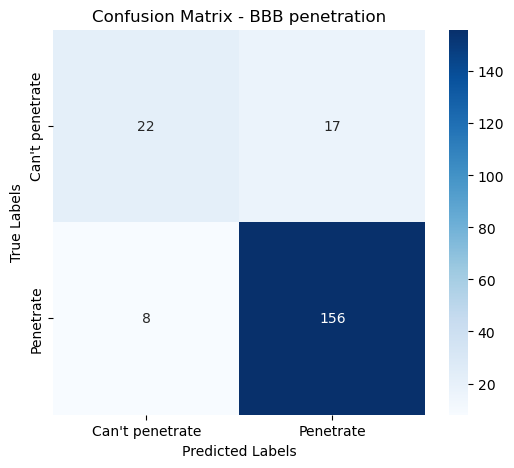

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 클래스 이름 정의
class_names = ["Can't penetrate","Penetrate"]

# Heatmap 그리기
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - BBB penetration')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('./Plot/Confusion_matrix/BBB penetration.png')
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.708     0.436     0.540        39
           1      0.877     0.957     0.915       164

    accuracy                          0.857       203
   macro avg      0.793     0.697     0.728       203
weighted avg      0.845     0.857     0.843       203



In [38]:
# 모델 훈련 후
model_1st.save_checkpoint(model_dir="./BBB_penetration/model_1st")  # 원하는 경로 지정

In [21]:
model

In [17]:
print("Train labels shape:", train_dataset.y.shape)
print("Valid labels shape:", valid_dataset.y.shape)


Train labels shape: (1624,)
Valid labels shape: (203,)
